In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import mu, get_velocity_profile, boxcarsmoothtrend, oh_to_12pluslog
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [2]:
outputs = [
    "../outputs/linear/dvdr-0p1-centraloutflow",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7"
]
outputs = [vice.output(name) for name in outputs]

/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


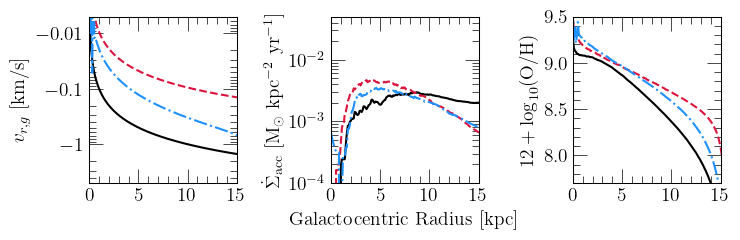

In [3]:
COLORS = ["black", "crimson", "dodgerblue"]
LINESTYLES = ["-", "--", "-."]
LABELS = [
    r"$\tau / L = -0.1$ Gyr$^{-1}$",
    r"$\gamma = 0.2$",
    r"$\beta_{\phi,\text{acc}} = 0.7$"
]

fig = plt.figure(figsize = (7.5, 2.5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([0, 15])
    axes[i].set_xticks([0, 5, 10, 15])
axes[1].set_xlabel(r"Galactocentric Radius [kpc]")
axes[0].set_ylabel(r"$v_{r,g}$ [km/s]")
axes[1].set_ylabel(r"$\dot\Sigma_\text{acc}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
axes[2].set_ylabel(r"$12 + \log_{10}$(O/H)")
axes[0].set_yscale("log")
axes[0].yaxis.set_major_formatter(fsf("%g"))
axes[1].set_yscale("log")
axes[0].set_ylim([0.005, 5])
axes[1].set_ylim([1.0e-4, 0.05])
axes[2].set_ylim([7.7, 9.5])

def boxcarsmoothtrend(xvals, yvals, window = 5):
    newyvals = []
    for i in range(len(xvals)):
        start = max(i - window, 0)
        stop = min(i + window, len(xvals) + window - 1)
        newyvals.append(np.mean(yvals[start:stop]))
    return newyvals

def plot_model(ax_v, ax_acc, ax_oh, output, lookback = 0, zone_width = 0.1, **kwargs):
    radii, vgas = get_velocity_profile(output, lookback)
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    ifr = []
    oh = []
    for i in range(len(radii)):
        zone = output.zones["zone%d" % (i)]
        area = np.pi * zone_width**2 * ((i + 1)**2 - i**2)
        ifr.append(zone.history["ifr"][idx] / area)
        oh.append(zone.history["[o/h]"][idx])
    ifr = boxcarsmoothtrend(radii, ifr)
    oh = [oh_to_12pluslog(_) for _ in oh]
    ax_v.plot(radii, [-v for v in vgas], **kwargs)
    ax_acc.plot(radii, ifr, **kwargs)
    ax_oh.plot(radii, oh, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_model(*axes, outputs[i], **kwargs)

negative_log(axes[0])
plt.tight_layout()
plt.show()

In [2]:
def mendezdelgado2022_profile():
    radii = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
#     oh = [np.log10(vice.solar_z.epsilon_to_z_conversion(9.22, 15.999) /
#                    vice.solar_z['o']) - 0.059 * r for r in radii]
    log_oh_plus12 = [9.22 - 0.059 * r for r in radii]
    return [radii, log_oh_plus12]

In [18]:
outputs = [
    # "../outputs/potential_well_deepening/gamma0p1",
    # "../outputs/potential_well_deepening/gamma0p2",
    "../outputs/potential_well_deepening/gamma0p3"
]
outputs = [vice.output(name) for name in outputs]

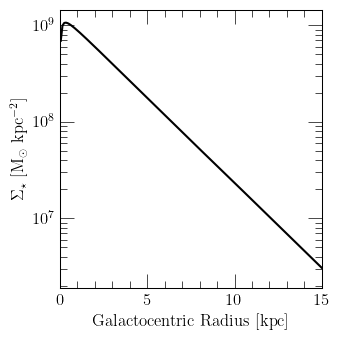

In [19]:
COLORS = ["black", "crimson", "dodgerblue"]

fig = plt.figure(figsize = (3.5, 3.5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$\Sigma_\star$ [M$_\odot$ kpc$^{-2}$]")
ax.set_yscale("log")
ax.set_xlim([0, 15])

def plot_surface_density_profile(ax, output, lookback, zone_width = 0.1, **kwargs):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    sigma_star = []
    for i in range(len(radii)):
        area = np.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
        mstar = output.zones["zone%d" % (i)].history["mstar"][idx]
        sigma_star.append(mstar / area)
    ax.plot(radii, sigma_star, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]]
    }
    plot_surface_density_profile(ax, outputs[i], 0, **kwargs)

plt.tight_layout()
plt.show()

In [3]:
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/constant/vgas-0p5",
    "../outputs/constant/vgas-1",
    "../outputs/constant/vgas-1p5"
    # "../outputs/potential-well-deepening/gamma0p1",
    # "../outputs/potential-well-deepening/gamma0p2",
    # "../outputs/potential-well-deepening/gamma0p3"
    # "../outputs/constant/vgas-0p5",
    # "../outputs/potential_well_deepening/gamma0p2",
    # "../outputs/amd/betaphiin0p7",
    # "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

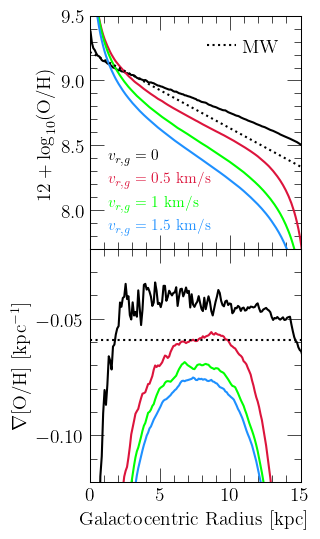

In [17]:
COLORS = ["black", "crimson", "lime", "dodgerblue"]
LINESTYLES = ["-", "-", "-", "-"]
LABELS = [
    r"$v_{r,g} = 0$",
    r"$v_{r,g} = 0.5$ km/s",
    r"$v_{r,g} = 1$ km/s",
    r"$v_{r,g} = 1.5$ km/s"
    # r"$\gamma = 0$",
    # r"$\gamma = 0.1$",
    # r"$\gamma = 0.2$",
    # r"$\gamma = 0.3$"
]

fig = plt.figure(figsize = (3.3, 5.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
ax2.set_ylabel(r"$\nabla$[O/H] [kpc$^{-1}$]")
ax1.set_ylabel(r"$12 + \log_{10}$(O/H)")
ax1.set_xlim([0, 15])
ax1.set_ylim([7.7, 9.5])
ax2.set_ylim([-0.12, -0.02])
ax2.set_yticks([-0.1, -0.05])

def plot_metallicity_profile(ax_profile, ax_grad, output, lookback, zone_width = 0.1, **kwargs):
    # n_zones = len(output.zones.keys())
    n_zones = 155
    radii = [zone_width * (i + 0.5) for i in range(n_zones)]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    oh = [output.zones["zone%d" % (i)].history["[o/h]"][idx] for i in range(n_zones)]
    oh = oh_to_12pluslog(oh)
    gradoh = [(outer - inner) / zone_width for outer, inner in zip(oh[1:], oh[:-1])]
    gradoh = boxcarsmoothtrend(radii[:-1], gradoh, window = 5)
    ax_profile.plot(radii, oh, **kwargs)
    ax_grad.plot(radii[:-1], gradoh, **kwargs)

kwargs = {
    "c": named_colors()["black"],
    "linestyle": ":",
    "label": r"MW"
}
line = ax1.plot([1, 2], [1, 2], **kwargs)[0]
kwargs = {
    "loc": mpl_loc("upper right"),
    "bbox_to_anchor": (0.98, 0.98),
    "handlelength": 1.5
}
leg = ax1.legend(**kwargs)
ax1.add_artist(leg)
line.remove()

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_metallicity_profile(ax1, ax2, outputs[i], 0, **kwargs)

radii, oh = mendezdelgado2022_profile()
ax1.plot(radii, oh, c = named_colors()["black"], linestyle = ":")
ax2.axhline(-0.059, c = named_colors()["black"], linestyle = ":")

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "fontsize": 11
}
leg = ax1.legend(**kwargs)
fancy_legend(leg, COLORS)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.show()

In [4]:
outputs = [
    "../outputs/constant/vgas-0p5",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7",
    "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

/Users/jamesjohnson/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  mu += (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
/Users/jamesjohnson/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:100: RuntimeWarning: invalid value encountered in scalar multiply
  mu *= -tau_star * vgas[i]
/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_57436/2915787736.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_57436/2915787736.py:169: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enoug

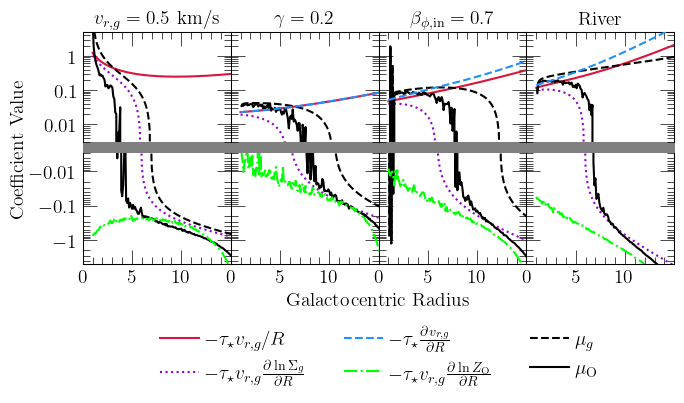

In [5]:
TITLES = [
    r"$v_{r,g} = 0.5$ km/s",
    r"$\gamma = 0.2$",
    r"$\beta_{\phi,\text{in}} = 0.7$",
    r"River"
]

fig = plt.figure(figsize = (7, 4))
pos = len(outputs) * [None]
neg = len(outputs) * [None]
for i in range(len(pos)):
    pos[i] = fig.add_subplot(241 + i)
    plt.setp(pos[i].get_xticklabels(), visible = False)
    neg[i] = fig.add_subplot(245 + i)
    if i:
        plt.setp(pos[i].get_yticklabels(), visible = False)
        plt.setp(neg[i].get_yticklabels(), visible = False)
    else: pass
    kwargs = {
        "axis": "x",
        "which": "both",
        "bottom": False
    }
    pos[i].tick_params(**kwargs)
    kwargs["bottom"] = True
    kwargs["top"] = False
    neg[i].tick_params(**kwargs)
    pos[i].spines["bottom"].set_visible(False)
    neg[i].spines["top"].set_visible(False)
    pos[i].set_yscale("log")
    neg[i].set_yscale("log")
    pos[i].set_xlim([0, 15])
    neg[i].set_xlim([0, 15])
    pos[i].set_ylim([0.003, 5])
    neg[i].set_ylim([0.003, 5])
    # pos[i].set_yticks([0.01, 0.1, 1, 10])
    # neg[i].set_yticks([0.01, 0.1, 1, 10])
    pos[i].set_xticks([0, 5, 10])
    neg[i].set_xticks([0, 5, 10])
    pos[i].set_title(TITLES[i])
    
dummy = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
dummy.set_xlabel(r"Galactocentric Radius", labelpad = 20)
dummy.set_ylabel(r"Coefficient Value", labelpad = 40)
# xlabelpad = 40
# if WHICH == "mu_o":
#     dummy.set_ylabel(r"$\mu_\text{O}$", labelpad = xlabelpad)
# elif WHICH == "mu_g":
#     dummy.set_xlabel(r"$\mu_g = \dot\Sigma_{\alpha,\text{flow}} / \dot\Sigma_\star$", labelpad = xlabelpad)
# else:
#     raise ValueError("Bad WHICH bruh.")
dummy.set_xlim([0, 1])
dummy.set_ylim([0, 1])
dummy.spines["left"].set_visible(False)
dummy.spines["right"].set_visible(False)
pos[0].yaxis.set_major_formatter(fsf("%g"))
neg[0].yaxis.set_major_formatter(fsf("%g"))


def plot_mu(ax_pos, ax_neg, output, lookback, zone_width = 0.1):
    n_zones = int(15.5 / zone_width)
    radii, vgas = get_velocity_profile(output, lookback)
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    one_over_r_term = []
    density_profile_term = []
    velocity_profile_term = []
    gradz_term = []
    start = 10
    for i in range(start, n_zones):
        zone = output.zones["zone%d" % (i)]
        neighbor = output.zones["zone%d" % (i + 1)]
        if zone.history["sfr"][idx]:
            tau_star = 1.e-9 * zone.history["mgas"][idx] / zone.history["sfr"][idx]
        else:
            tau_star = float("inf")
        tv = tau_star * vgas[i]
        one_over_r_term.append(-tv / radii[i] if radii[i] else float("inf"))
        area = np.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
        n_area = np.pi * ((radii[i] + 2 * zone_width)**2 - (radii[i] + zone_width)**2)
        sigma_g = zone.history["mgas"][idx]
        n_sigma_g = neighbor.history["mgas"][idx]
        dlnsigmag_dr = (n_sigma_g - sigma_g) / (sigma_g * zone_width)
        density_profile_term.append(-tv * dlnsigmag_dr)
        dlnv_dr = (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
        velocity_profile_term.append(-tv * dlnv_dr)
        dlnz_dr = (neighbor.history["z(o)"][idx] - zone.history["z(o)"][idx]) / (zone.history["z(o)"][idx] * zone_width)
        gradz_term.append(-tv * dlnz_dr)
    radii = radii[start:n_zones]
    
    kwargs = { # one over r
        "c": named_colors()["crimson"],
        "label": r"$-\tau_\star v_{r,g} / R$",
        "linestyle": "-"
    }
    # one_over_r_term = boxcarsmoothtrend(radii, one_over_r_term, window = 5)
    ax_pos.plot(radii, one_over_r_term, **kwargs)
    ax_neg.plot(radii, [-o for o in one_over_r_term], **kwargs)
    
    kwargs = { # surface density profile
        "c": named_colors()["darkviolet"],
        "label": r"$-\tau_\star v_{r,g} \frac{\partial \ln \Sigma_g}{\partial R}$",
        "linestyle": ":",
    }
    # density_profile_term = boxcarsmoothtrend(radii, density_profile_term, window = 5)
    ax_pos.plot(radii, density_profile_term, **kwargs)
    ax_neg.plot(radii, [-d for d in density_profile_term], **kwargs)
    
    kwargs = { # velocity profile
        "c": named_colors()["dodgerblue"],
        "label": r"$-\tau_\star \frac{\partial v_{r,g}}{\partial R}$",
        "linestyle": "--",
        "zorder": 1000
    }
    # velocity_profile_term = boxcarsmoothtrend(radii, velocity_profile_term, window = 10)
    ax_pos.plot(radii, velocity_profile_term, **kwargs)
    ax_neg.plot(radii, [-v for v in velocity_profile_term], **kwargs)

    kwargs = { # metallicity gradient
        "c": named_colors()["lime"],
        "label": r"$-\tau_\star v_{r,g} \frac{\partial \ln Z_\text{O}}{\partial R}$",
        "linestyle": "-.",
        "zorder": 1000
    }
    # gradz_term = boxcarsmoothtrend(radii, gradz_term, window = 5)
    ax_pos.plot(radii, gradz_term, **kwargs)
    ax_neg.plot(radii, [-g for g in gradz_term], **kwargs)

    _, mu_g, mu_o = mu(output, lookback, zone_width = zone_width)

    # total = [a + b + c for a, b, c in zip(one_over_r_term, density_profile_term, velocity_profile_term)]
    total = mu_g[:len(radii)]
    kwargs = { # mu_gas
        "c": named_colors()["black"],
        "label": r"$\mu_g$",
        "linestyle": "--"
    }
    # total = boxcarsmoothtrend(radii, total, window = 5)
    ax_pos.plot(radii, total, **kwargs)
    ax_neg.plot(radii, [-t for t in total], **kwargs)

    total = [a + b for a, b in zip(total, gradz_term)]
    kwargs = { # mu_o
        "c": named_colors()["black"],
        "label": r"$\mu_\text{O}$",
        "linestyle": "-"
    }
    # total = boxcarsmoothtrend(radii, total, window = 5)
    total = mu_o[:len(radii)]
    ax_pos.plot(radii, total, **kwargs)
    ax_neg.plot(radii, [-t for t in total], **kwargs)

for i in range(len(outputs)):
    plot_mu(pos[i], neg[i], outputs[i], 0)

kwargs = {
    "loc": mpl_loc("upper center"),
    "bbox_to_anchor": (1, -0.4),
    # "ncol": {"mu_o": 5, "mu_g": 4}[WHICH],
    "ncol": 3,
    "handlelength": 2
}
neg[1].legend(**kwargs)

h = 0.1
dummy.fill_between(dummy.get_xlim(), 2 * [0.5 + h / 2], 2 * [0.5 - h / 2], color = named_colors()["grey"])
for i in range(len(outputs)):
    negative_log(neg[i])
plt.tight_layout()
# plt.subplots_adjust(hspace = h, wspace = 0, bottom = 0.15, top = 0.7, right = 0.97)
plt.subplots_adjust(hspace = h, wspace = 0, bottom = 0.32, top = 0.9, right = 0.97)
dummy.set_position([
    neg[0].get_position().x0,
    neg[0].get_position().y0,
    neg[-1].get_position().x1 - neg[0].get_position().x0,
    pos[0].get_position().y1 - neg[0].get_position().y0
])
# for ext in ["pdf", "jpeg"]:
#     kwargs = {}
#     if ext == "jpeg": kwargs["dpi"] = 200
#     plt.savefig("./profiles/mu-fiducial-models.%s" % (ext), **kwargs)
plt.show()

In [2]:
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/constant/vgas-1-centraloutflow",
    "../outputs/linear/dvdr-0p05-centraloutflow",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7",
    "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

../outputs/constant/vgas-0 -0.0
../outputs/constant/vgas-1-centraloutflow 1.0
../outputs/linear/dvdr-0p05-centraloutflow 0.4
../outputs/potential-well-deepening/gamma0p2 0.0759001
../outputs/angular-momentum-dilution/betaphiin0p7 0.239866
../outputs/river/insideout 0.780163


/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


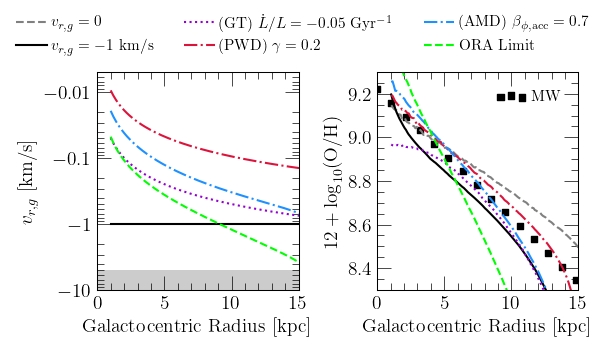

In [4]:
COLORS = ["grey", "black", "darkviolet", "crimson", "dodgerblue", "lime"]
LINESTYLES = ["--", "-", ":", "-.", "-.", "--"]
LABELS = [
    r"$v_{r,g} = 0$",
    r"$v_{r,g} = -1$ km/s",
    r"(GT) $\dot L/L = -0.05$ Gyr$^{-1}$",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{acc}} = 0.7$",
    r"ORA Limit"
]

fig = plt.figure(figsize = (6, 3.5))
axes = []
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlim([0, 15])
    axes[i].set_xlabel(r"Galactocentric Radius [kpc]")
    axes[i].set_xticks([0, 5, 10, 15])
axes[0].set_ylabel(r"$v_{r,g}$ [km/s]")
axes[0].set_ylim([0.005, 10])
axes[0].set_yscale("log")
axes[0].yaxis.set_major_formatter(fsf("%g"))
axes[1].set_ylabel(r"$12 + \log_{10}(\text{O/H})$")
axes[1].set_ylim([8.3, 9.3])

def mendezdelgado2022_profile():
    radii = np.linspace(axes[0].get_xlim()[0], axes[0].get_xlim()[1], 100)
#     oh = [np.log10(vice.solar_z.epsilon_to_z_conversion(9.22, 15.999) /
#                    vice.solar_z['o']) - 0.059 * r for r in radii]
    log_oh_plus12 = [9.22 - 0.059 * r for r in radii]
    return [radii, log_oh_plus12]

def plot_velocity_profile(ax, output, lookback = 0, zone_width = 0.1, **kwargs):
    # assert os.path.exists("%s_gasvelocities.out" % (output.name)), "bruh"
    if os.path.exists("%s_gasvelocities.out" % (output.name)):
        radii, vgas = get_velocity_profile(output, lookback)
    else:
        radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
        vgas = len(radii) * [0.]
    # print(radii, vgas)
    vgas = [-v for v in vgas]
    print(output.name, vgas[int(8 / zone_width)])
    start = int(1 / zone_width)
    ax.plot(radii[start:], vgas[start:], **kwargs)

def plot_metallicity_profile(ax, output, lookback = 0, zone_width = 0.1, **kwargs):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    oh = [output.zones["zone%d" % (i)].history["[o/h]"][idx] for i in range(len(output.zones.keys()))]
    oh = [oh_to_12pluslog(o) for o in oh]
    start = int(1 / zone_width)
    ax.plot(radii[start:], oh[start:], **kwargs)

axes[0].fill_between(axes[0].get_xlim(), 2 * [5], 2 * [axes[0].get_ylim()[1]],
    # hatch = "xxx", edgecolor = "grey", facecolor = "white")
     facecolor = "grey", alpha = 0.4)

radii, oh = mendezdelgado2022_profile()
handle = axes[1].scatter(radii[::7], oh[::7], c = named_colors()["black"], marker = markers()["square"], s = 20)
axes[1].legend([handle], ["MW"], fontsize = 11, loc = mpl_loc("upper right"), handlelength = 2, bbox_to_anchor = (0.98, 0.98))

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_velocity_profile(axes[0], outputs[i], **kwargs)
    kwargs["label"] = None
    plot_metallicity_profile(axes[1], outputs[i], **kwargs)

kwargs = {
    "loc": mpl_loc("upper center"),
    "handlelength": (0.5, 0.99),
    "ncol": 3,
    "fontsize": 11,
    "handlelength": 2
}
leg = fig.legend(**kwargs)

negative_log(axes[0])
plt.tight_layout()
plt.subplots_adjust(top = 0.8)
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./profiles/velocity-metallicity-scenariocomp.%s" % (ext), **kwargs)
plt.show()

../outputs/constant/vgas-0 -0.0
../outputs/constant/vgas-1-centraloutflow 1.0
../outputs/linear/dvdr-0p1-centraloutflow 0.8
../outputs/potential-well-deepening/gamma0p2 0.0759001
../outputs/angular-momentum-dilution/betaphiin0p7 0.239866
../outputs/river/insideout 0.780163


/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


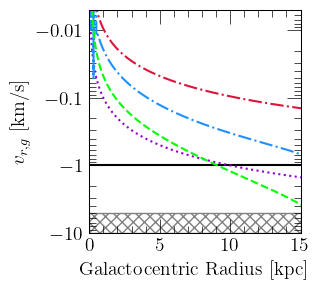

In [6]:
COLORS = ["grey", "black", "darkviolet", "crimson", "dodgerblue", "lime"]
LINESTYLES = ["--", "-", ":", "-.", "-.", "--"]
LABELS = [
    r"$v_{r,g} = 0$",
    r"$v_{r,g} = -1$ km/s",
    r"(GT) $\dot L/L = -0.1$ Gyr$^{-1}$}",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{acc}} = 0.7$",
    r"ORA Limit"
]

fig = plt.figure(figsize = (3.3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$v_{r,g}$ [km/s]")
ax.set_xlim([0, 15])
ax.set_ylim([0.005, 10])
ax.set_yscale("log")
ax.yaxis.set_major_formatter(fsf("%g"))

def plot_velocity_profile(output, lookback, zone_width = 0.1, **kwargs):
    # assert os.path.exists("%s_gasvelocities.out" % (output.name)), "bruh"
    if os.path.exists("%s_gasvelocities.out" % (output.name)):
        radii, vgas = get_velocity_profile(output, lookback)
    else:
        radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
        vgas = len(radii) * [0.]
    # print(radii, vgas)
    vgas = [-v for v in vgas]
    print(output.name, vgas[int(8 / zone_width)])
    ax.plot(radii, vgas, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_velocity_profile(outputs[i], 0, **kwargs)

# ax.fill_between(ax.get_xlim(), 2 * [5], 2 * [ax.get_ylim()[1]], color = named_colors()["grey"])
ax.fill_between(ax.get_xlim(), 2 * [5], 2 * [ax.get_ylim()[1]],
    hatch = "xxx", edgecolor = "grey", facecolor = "white")

# kwargs = {
#     "loc": mpl_loc("lower left"),
#     # "bbox_to_anchor": (0.5, 1.05),
#     "fontsize": 11,
#     # "ncol": 2
# }
# ax.legend(**kwargs)

negative_log(ax)
plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./profiles/velocity-comp.%s" % (ext), **kwargs)
plt.show()

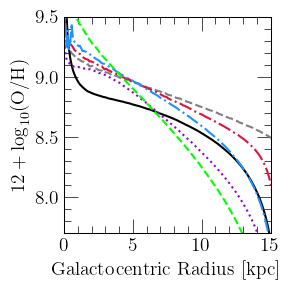

In [8]:
COLORS = ["grey", "black", "darkviolet", "crimson", "dodgerblue", "lime"]
LINESTYLES = ["--", "-", ":", "-.", "-.", "--"]
LABELS = [
    r"$v_{r,g} = 0$",
    r"$v_{r,g} = -1$ km/s",
    r"(GT) $\dot L/L = -0.1$ Gyr$^{-1}$}",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{acc}} = 0.7$",
    r"ORA Limit"
]

fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$12 + \log_{10}(\text{O/H})$")
ax.set_xlim([0, 15])
ax.set_ylim([7.7, 9.5])

def plot_metallicity_profile(ax, output, lookback = 0, zone_width = 0.1, **kwargs):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    oh = [output.zones["zone%d" % (i)].history["[o/h]"][idx] for i in range(len(output.zones.keys()))]
    oh = [oh_to_12pluslog(o) for o in oh]
    ax.plot(radii, oh, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_metallicity_profile(ax, outputs[i], **kwargs)

plt.tight_layout()
plt.show()

In [2]:
outputs = [
    "../outputs/constant/vgas-0p5",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7",
    "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

/Users/astrobeard/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  tau_star = zone.history["mgas"][idx] / zone.history["sfr"][idx]
/Users/astrobeard/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:94: RuntimeWarning: invalid value encountered in double_scalars
  tau_star *= 1.e-9
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_28171/2310656491.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


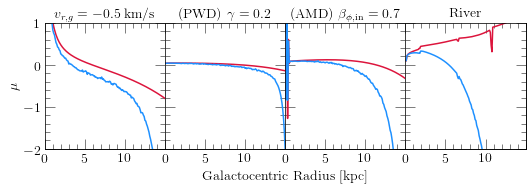

In [13]:
# COLORS = ["crimson", "dodgerblue", "black", "lime"]
# LINESTYLES = [":", "--", "-.", "-", ":"]
LABELS = [
    r"$v_{r,g} = -0.5$ km/s",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{in}} = 0.7$",
    r"River"
]

fig = plt.figure(figsize = (7.5, 2.5))
axes = []
for i in range(4):
    axes.append(fig.add_subplot(141 + i))
    axes[i].set_xlim([0, 15])
    axes[i].set_ylim([-2, 1])
    axes[i].set_xticks([0, 5, 10])
    axes[i].set_title(LABELS[i])
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)
axes[0].set_ylabel(r"$\mu$")
dummy = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
dummy.set_xlabel(r"Galactocentric Radius [kpc]", labelpad = 20)

def plot_mu(ax, output, lookback = 0, zone_width = 0.1, **kwargs):
    radii, mu_g, mu_o = mu(output, lookback, zone_width = zone_width)
    ax.plot(radii[:-1], mu_g, c = named_colors()["crimson"], label = r"$\mu_g$", **kwargs)
    ax.plot(radii[:-1], mu_o, c = named_colors()["dodgerblue"], label = r"$\mu_\text{O}$", **kwargs)
    
for i in range(len(outputs)):
    plot_mu(axes[i], outputs[i])

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
dummy.set_position([
    axes[0].get_position().x0,
    axes[0].get_position().y0,
    axes[-1].get_position().x1 - axes[0].get_position().x0,
    axes[0].get_position().y1 - axes[0].get_position().y0
])
plt.show()

/Users/astrobeard/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  mu += (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
/Users/astrobeard/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:100: RuntimeWarning: invalid value encountered in double_scalars
  mu *= -tau_star * vgas[i]
/Users/astrobeard/Work/Research/lib/personal/plots/mpltoolkit/core.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_71783/848448414.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


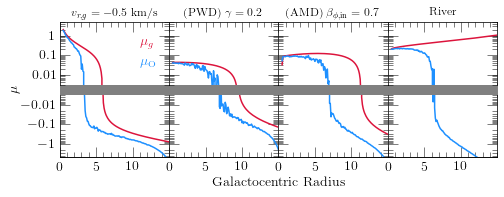

In [3]:
LABELS = [
    r"$v_{r,g} = -0.5$ km/s",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{in}} = 0.7$",
    r"River"
]

fig = plt.figure(figsize = (7, 2.8))
pos = len(outputs) * [None]
neg = len(outputs) * [None]
for i in range(len(pos)):
    pos[i] = fig.add_subplot(241 + i)
    plt.setp(pos[i].get_xticklabels(), visible = False)
    neg[i] = fig.add_subplot(245 + i)
    if i:
        plt.setp(pos[i].get_yticklabels(), visible = False)
        plt.setp(neg[i].get_yticklabels(), visible = False)
    else: pass
    kwargs = {
        "axis": "x",
        "which": "both",
        "bottom": False
    }
    pos[i].tick_params(**kwargs)
    kwargs["bottom"] = True
    kwargs["top"] = False
    neg[i].tick_params(**kwargs)
    pos[i].spines["bottom"].set_visible(False)
    neg[i].spines["top"].set_visible(False)
    pos[i].set_yscale("log")
    neg[i].set_yscale("log")
    pos[i].set_xlim([0, 15])
    neg[i].set_xlim([0, 15])
    pos[i].set_ylim([0.003, 5])
    neg[i].set_ylim([0.003, 5])
    # pos[i].set_yticks([0.01, 0.1, 1, 10])
    # neg[i].set_yticks([0.01, 0.1, 1, 10])
    pos[i].set_xticks([0, 5, 10])
    neg[i].set_xticks([0, 5, 10])
    pos[i].set_title(LABELS[i], fontsize = 12)
    
dummy = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
dummy.set_xlabel(r"Galactocentric Radius", labelpad = 20)
dummy.set_ylabel(r"$\mu$", labelpad = 40)
# xlabelpad = 40
# if WHICH == "mu_o":
#     dummy.set_ylabel(r"$\mu_\text{O}$", labelpad = xlabelpad)
# elif WHICH == "mu_g":
#     dummy.set_xlabel(r"$\mu_g = \dot\Sigma_{\alpha,\text{flow}} / \dot\Sigma_\star$", labelpad = xlabelpad)
# else:
#     raise ValueError("Bad WHICH bruh.")
dummy.set_xlim([0, 1])
dummy.set_ylim([0, 1])
dummy.spines["left"].set_visible(False)
dummy.spines["right"].set_visible(False)
pos[0].yaxis.set_major_formatter(fsf("%g"))
neg[0].yaxis.set_major_formatter(fsf("%g"))

def plot_mu(pos, neg, output, lookback = 0, zone_width = 0.1, **kwargs):
    radii, mu_g, mu_o = mu(output, lookback, zone_width = zone_width)
    pos.plot(radii[5:-1], mu_g[5:], c = named_colors()["crimson"], label = r"$\mu_g$", **kwargs)
    neg.plot(radii[5:-1], [-m for m in mu_g][5:], c = named_colors()["crimson"], label = r"$\mu_g$", **kwargs)
    pos.plot(radii[5:-1], mu_o[5:], c = named_colors()["dodgerblue"], label = r"$\mu_\text{O}$", **kwargs)
    neg.plot(radii[5:-1], [-m for m in mu_o][5:], c = named_colors()["dodgerblue"], label = r"$\mu_\text{O}$", **kwargs)
#     ax.plot(radii[:-1], mu_g, c = named_colors()["crimson"], label = r"$\mu_g$", **kwargs)
#     ax.plot(radii[:-1], mu_o, c = named_colors()["dodgerblue"], label = r"$\mu_\text{O}$", **kwargs)

for i in range(len(outputs)): plot_mu(pos[i], neg[i], outputs[i])
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "handlelength": 0,
    "fontsize": 14
}
leg = pos[0].legend(**kwargs)
fancy_legend(leg, ["crimson", "dodgerblue"])

h = 0.1
dummy.fill_between(dummy.get_xlim(), 2 * [0.5 + h / 2], 2 * [0.5 - h / 2], color = named_colors()["grey"])
for i in range(len(outputs)):
    negative_log(neg[i])
plt.tight_layout()
plt.subplots_adjust(wspace = 0, bottom = 0.2, left = 0.11)
dummy.set_position([
    neg[0].get_position().x0,
    neg[0].get_position().y0,
    neg[-1].get_position().x1 - neg[0].get_position().x0,
    pos[0].get_position().y1 - neg[0].get_position().y0
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./profiles/mu-comparison.%s" % (ext), **kwargs)
plt.show()

In [51]:
outputs = [
    "../outputs/constant/vgas-1-centraloutflow",
    "../outputs/linear/dvdr-0p05-centraloutflow",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7",
    "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

/Users/jamesjohnson/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  mu += (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
/Users/jamesjohnson/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:100: RuntimeWarning: invalid value encountered in scalar multiply
  mu *= -tau_star * vgas[i]
/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_65004/3218784392.py:130: UserWarning: This figure includes Axes that are not compatible with tig

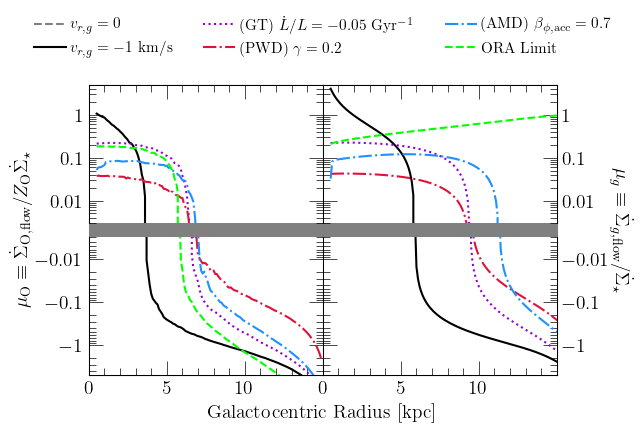

In [52]:
COLORS = ["black", "darkviolet", "crimson", "dodgerblue", "lime"]
LINESTYLES = ["-", ":", "-.", "-.", "--"]
LABELS = [
    r"$v_{r,g} = -1$ km/s",
    r"(GT) $\dot L/L = -0.05$ Gyr$^{-1}$",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{acc}} = 0.7$",
    r"ORA Limit"
]

fig = plt.figure(figsize = (6.5, 4.5))
pos = 2 * [None]
neg = 2 * [None]
dummies = 2 * [None]
for i in range(2):
    pos[i] = fig.add_subplot(221 + i)
    plt.setp(pos[i].get_xticklabels(), visible = False)
    neg[i] = fig.add_subplot(223 + i)
    if i:
        # plt.setp(pos[i].get_yticklabels(), visible = False)
        # plt.setp(neg[i].get_yticklabels(), visible = False)
        pos[i].tick_params(axis='y', which='both', labelleft=False, labelright=True)
        neg[i].tick_params(axis='y', which='both', labelleft=False, labelright=True)
        # pos[i].yaxis.set_label_position("right")
        # neg[i].yaxis.set_label_position("right")
        # pos[i].yaxis.tick_right()
        # neg[i].yaxis.tick_right()
    else: pass
    kwargs = {
        "axis": "x",
        "which": "both",
        "bottom": False
    }
    pos[i].tick_params(**kwargs)
    kwargs["bottom"] = True
    kwargs["top"] = False
    neg[i].tick_params(**kwargs)
    pos[i].spines["bottom"].set_visible(False)
    neg[i].spines["top"].set_visible(False)
    # neg[i].set_xlabel(r"Galactocentric Radius [kpc]")
    pos[i].set_yscale("log")
    neg[i].set_yscale("log")
    pos[i].set_xlim([0, 15])
    neg[i].set_xlim([0, 15])
    pos[i].set_ylim([0.003, 5])
    neg[i].set_ylim([0.003, 5])
    # pos[i].set_yticks([0.01, 0.1, 1, 10])
    # neg[i].set_yticks([0.01, 0.1, 1, 10])
    pos[i].set_xticks([0, 5, 10])
    neg[i].set_xticks([0, 5, 10])
    pos[i].yaxis.set_major_formatter(fsf("%g"))
    neg[i].yaxis.set_major_formatter(fsf("%g"))
    dummies[i] = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
    kwargs = {"labelpad": 40}
    if i:
        dummies[i].yaxis.set_label_position("right")
        kwargs["labelpad"] = 55
        kwargs["rotation"] = 270
    else: pass
    dummies[i].set_ylabel({
        0: r"$\mu_\text{O} \equiv \dot\Sigma_\text{O,flow} / Z_\text{O}\dot\Sigma_\star$",
        1: r"$\mu_g \equiv \dot\Sigma_{g,\text{flow}} / \dot\Sigma_\star$"}[i],
        **kwargs)
    # dummies[i].set_xlim([0, 1])
    # dummies[i].set_ylim([0, 1])
    # dummies[i].spines["left"].set_visible(False)
    # dummies[i].spines["right"].set_visible(False)
dummy = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
dummy.set_xlabel(r"Galactocentric Radius [kpc]", labelpad = 20)
# dummy.set_ylabel(r"$\mu$", labelpad = 40)
dummy.set_xlim([0, 1])
dummy.set_ylim([0, 1])
dummy.spines["left"].set_visible(False)
dummy.spines["right"].set_visible(False)
pos[0].yaxis.set_major_formatter(fsf("%g"))
neg[0].yaxis.set_major_formatter(fsf("%g"))

def plot_mu(output, lookback = 0, zone_width = 0.1, fill_to_top = False, **kwargs):
    radii, mu_g, mu_o = mu(output, lookback, zone_width = zone_width)
    radii = radii[5:-1]
    mu_g = mu_g[5:]
    mu_o = mu_o[5:]
    mu_o = boxcarsmoothtrend(radii, mu_o, window = 5)
    pos[0].plot(radii, mu_o, **kwargs)
    pos[1].plot(radii, mu_g, **kwargs)
    neg[0].plot(radii, [-m for m in mu_o], **kwargs)
    neg[1].plot(radii, [-m for m in mu_g], **kwargs)
    if fill_to_top:
        pos[1].fill_between([0] + radii, [mu_g[0]] + mu_g, (len(radii) + 1) * [pos[1].get_ylim()[1]],
            # hatch = "xxx", edgecolor = "lime", facecolor = "white", alpha = 0.5)
            zorder = 0, color = "black", alpha = 0.2)
        # pos[1].text(4, 1, r"Mass Conservation", fontsize = 10)
    else: pass

# ax.fill_between(ax.get_xlim(), 2 * [5], 2 * [ax.get_ylim()[1]],
#     hatch = "xxx", edgecolor = "grey", facecolor = "white")

pos[0].plot(pos[0].get_xlim(), 2 * [0.], c = named_colors()["grey"], linestyle = "--", label = r"$v_{r,g} = 0$")
for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_mu(outputs[i], **kwargs)
    # plot_mu(outputs[i], fill_to_top = "river" in outputs[i].name, **kwargs)

# kwargs = {
#     "loc": mpl_loc("upper right"),
#     "bbox_to_anchor": (0.98, 0.98),
#     "handlelength": 2.2,
#     "fontsize": 10
# }
# leg = pos[0].legend(**kwargs)
kwargs = {
    "loc": mpl_loc("lower center"),
    "ncol": 3,
    "bbox_to_anchor": (1.0, 1.1),
    "handlelength": 2.1,
    "fontsize": 11
}
leg = pos[0].legend(**kwargs)

h = 0.1
# for i in range(len(dummies)):
#     dummies[i].fill_between(dummies[i].get_xlim(), 2 * [0.5 + h / 2], 2 * [0.2 - h / 2], color = named_colors()["grey"])
dummy.fill_between(dummy.get_xlim(), 2 * [0.5 + h / 2], 2 * [0.5 - h / 2], color = named_colors()["grey"])
for i in range(len(neg)):
    negative_log(neg[i])
plt.tight_layout()
plt.subplots_adjust(wspace = 0, bottom = 0.15, left = 0.14, right = 0.86)
# plt.subplots_adjust(wspace = 0.35, bottom = 0.2, left = 0.12)
for i in range(len(dummies)):
    dummies[i].set_position([
        neg[i].get_position().x0,
        neg[i].get_position().y0,
        neg[i].get_position().x1 - neg[i].get_position().x0,
        pos[i].get_position().y1 - neg[i].get_position().y0
])
dummy.set_position([
    neg[0].get_position().x0,
    neg[0].get_position().y0,
    neg[-1].get_position().x1 - neg[0].get_position().x0,
    pos[0].get_position().y1 - neg[0].get_position().y0
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./profiles/mu-comparison.%s" % (ext), **kwargs)
plt.show()

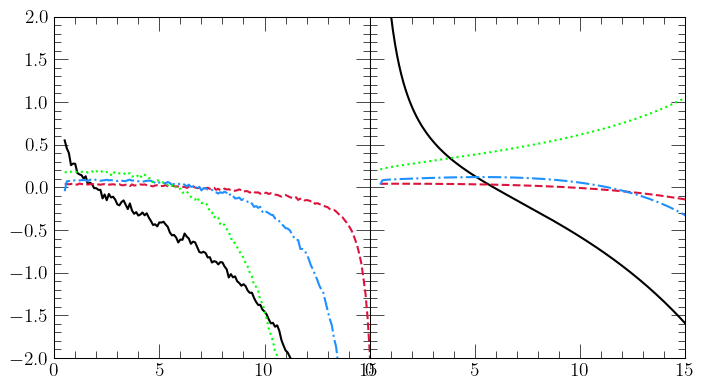

In [50]:
COLORS = ["black", "crimson", "dodgerblue", "lime"]
LINESTYLES = ["-", "--", "-.", ":"]
LABELS = [
    r"$v_{r,g} = -1$ km/s",
    r"$\gamma = 0.2$",
    r"$\beta_{\phi,\text{acc}} = 0.7$",
    r"ORA Limit"
]

fig = plt.figure(figsize = (7, 4))
axes = []
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlim([0, 15])
    axes[i].set_ylim([-2, 2])
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)

def plot_mu(output, lookback = 0, zone_width = 0.1, **kwargs):
    radii, mu_g, mu_o = mu(output, lookback, zone_width = zone_width)
    axes[0].plot(radii[5:-1], mu_o[5:], **kwargs)
    axes[1].plot(radii[5:-1], mu_g[5:], **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_mu(outputs[i], **kwargs)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()